In [2]:
from ics import Calendar
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [3]:
with open('data/FemTech_and_Feminist_Tech_Calendar.ics', 'r') as f:
    calendar = Calendar(f.read())

In [30]:
events = []
for event in calendar.events:
    events.append({
        'summary': event.name,
        'start': event.begin.datetime,
        'end': event.end.datetime,
        'duration_hours': (event.end.datetime - event.begin.datetime).total_seconds() / 3600
    })


In [31]:
df = pd.DataFrame(events)

In [32]:
df

,summary,start,end,duration_hours
0,"Participation, Trauma, and Privacy in Studying...",2025-05-27 12:00:00+00:00,2025-05-27 13:00:00+00:00,1.0
1,Exhibition,2025-06-04 00:00:00+00:00,2025-06-05 00:00:00+00:00,24.0
2,AymurAI project: feminist AI in Latin America,2025-05-26 12:00:00+00:00,2025-05-26 13:00:00+00:00,1.0
3,Deciphering the role of the microbiome for wom...,2025-05-15 11:00:00+00:00,2025-05-15 12:00:00+00:00,1.0
4,PhD Summer School,2025-05-22 00:00:00+00:00,2025-05-24 00:00:00+00:00,48.0
5,"Where social communication, ecological practic...",2025-05-30 12:00:00+00:00,2025-05-30 13:00:00+00:00,1.0
6,Post-growth and Feminist Tech,2025-05-28 12:00:00+00:00,2025-05-28 13:00:00+00:00,1.0
7,Intimate Data Party,2025-05-26 16:00:00+00:00,2025-05-26 19:00:00+00:00,3.0


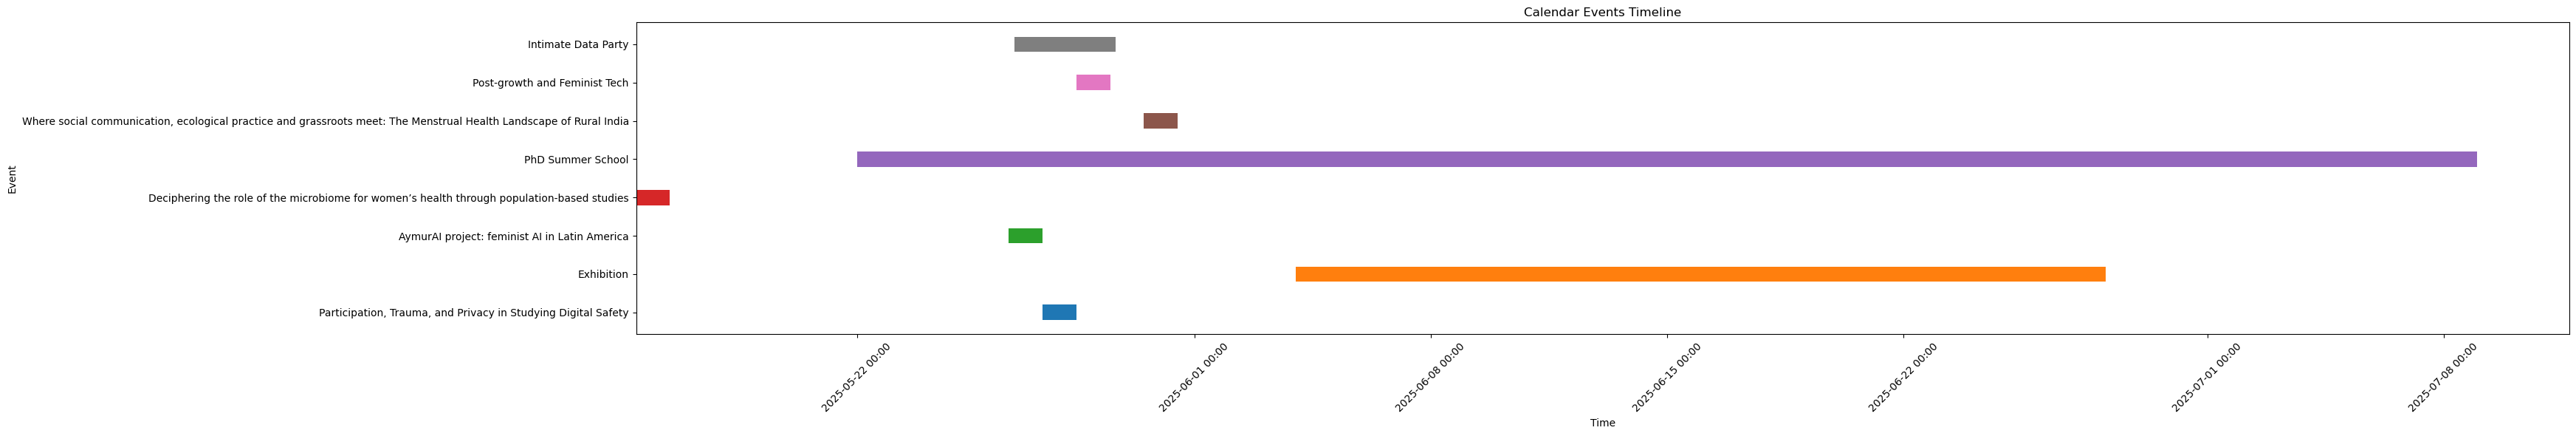

In [33]:
# Visualization: Gantt-style timeline of events
fig, ax = plt.subplots(figsize=(35, 6))

for i, row in df.iterrows():
    ax.barh(row['summary'], row['duration_hours'], left=row['start'], height=0.4)

ax.set_xlabel('Time')
ax.set_ylabel('Event')
ax.set_title('Calendar Events Timeline')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()